<a href="https://colab.research.google.com/github/dhairyachandra/KDM_Spring_2021/blob/main/ICP_11/ICP11_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.datasets import mnist, fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
from keras.utils import to_categorical

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


# Split dataset into images and labels
train_images, train_labels = train_images, train_labels
test_images, test_labels = test_images, test_labels
# Class names (needed only for illustration purposes)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
                   'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# Display information about the dataset
print("Training Data: {}, Labels Shape: {}".format(train_images.shape, train_labels.shape))
print("Testing Data {}, Labels Shape: {}".format(test_images.shape, test_labels.shape))

Training Data: (60000, 28, 28), Labels Shape: (60000,)
Testing Data (10000, 28, 28), Labels Shape: (10000,)


5 Images from the Training Data:


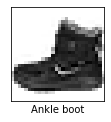

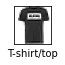

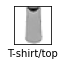

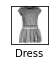

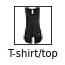

In [5]:
print("5 Images from the Training Data:")
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.show()


In [6]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

num_filters = 8
filter_size = 3
pool_size = 2


# Build the model.
model = Sequential([
    Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    
    Conv2D(num_filters, filter_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    
    Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [7]:
# Train the model.
h = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=50, batch_size=64,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/50
938/938 [==============================] - 36s 4ms/step - loss: 1.0495 - accuracy: 0.6357 - val_loss: 0.5371 - val_accuracy: 0.8032
Epoch 2/50
938/938 [==============================] - 3s 3ms/step - loss: 0.5039 - accuracy: 0.8160 - val_loss: 0.4727 - val_accuracy: 0.8315
Epoch 3/50
938/938 [==============================] - 3s 3ms/step - loss: 0.4558 - accuracy: 0.8359 - val_loss: 0.4530 - val_accuracy: 0.8385
Epoch 4/50
938/938 [==============================] - 3s 3ms/step - loss: 0.4222 - accuracy: 0.8506 - val_loss: 0.4295 - val_accuracy: 0.8441
Epoch 5/50
938/938 [==============================] - 3s 3ms/step - loss: 0.4034 - accuracy: 0.8561 - val_loss: 0.4101 - val_accuracy: 0.8510
Epoch 6/50
938/938 [==============================] - 3s 3ms/step - loss: 0.3933 - accuracy: 0.8590 - val_loss: 0.3961 - val_accuracy: 0.8583
Epoch 7/50
938/938 [==============================] - 3s 3ms/step - loss: 0.3768 - accuracy: 0.8629 - val_loss: 0.3910 - val_accuracy: 0.8584
Epoch

In [8]:
# printing the summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
activation (Activation)      (None, 26, 26, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 8)         584       
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 200)               0

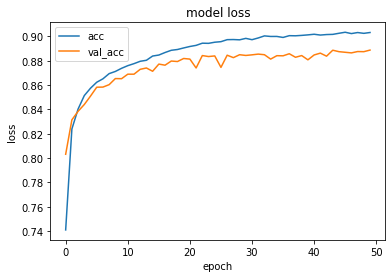

In [11]:
# plot the acc and val_acc
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

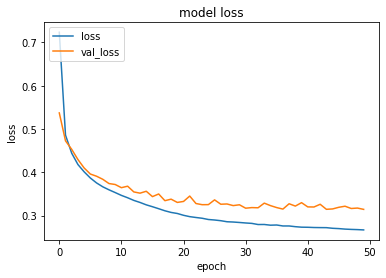

In [12]:
# plot the loss and val_loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [13]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

In [14]:
# Print our model's predictions.
print("These are the model predictions :")
print(np.argmax(predictions, axis=1)) 
print("\n")

# Check our predictions against the ground truths.
print("These are the corresponding labels :")
print(test_labels[:5]) 

These are the model predictions :
[9 2 1 1 6]


These are the corresponding labels :
[9 2 1 1 6]
